## Install required packages

In [5]:
!python --version
!pip --version
#!pip install --upgrade pip
!which pip
!which python

Python 3.7.6
pip 20.1 from /Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
/Users/xiaotong/opt/anaconda3/bin/pip
/Users/xiaotong/opt/anaconda3/bin/python


In [18]:
# !pip install spacy
# !pip install spacy-transformers

In [17]:
# !python -m spacy download en_trf_bertbaseuncased_lg
# !python -m spacy download en_core_web_sm

!pip list

# #spacy_bert

In [1]:
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bert = spacy.load('en_trf_bertbaseuncased_lg')
# doc = bert("Apple shares rose on the news. Apple pie is delicious.")

# print(doc[0],doc[7],doc[0].similarity(doc[7]))
# print(doc._.trf_last_hidden_state.shape)
df_idea = pd.read_csv('110data.csv');
df_idea['main']

0      Airport users who have layovers need to traver...
1      Our app intends to present a centralized datab...
2      Drivers want to be more involved in their vehi...
3      When thinking about choreographing a set for a...
4      Lack of access to class resources and the expe...
                             ...                        
109    A service designed to help disabled voters lea...
110    A website service and certification board to h...
111    VRN provides a safe environment for nurses to ...
112    Favour: A platform that allows people to help ...
113    LiliusMed: Intuitive decision-making platform ...
Name: main, Length: 114, dtype: object

In [7]:
doc_sim = [];
comp_num = 113;
doc0 = bert(df_idea['main'][comp_num]);
print(doc0);
for j in range(len(df_idea)):
    if comp_num != j:
        doc1 = bert(df_idea['main'][j]);
        sim = doc0.similarity(doc1);
        doc_sim.append(sim);
        print(j, sim);


LiliusMed: Intuitive decision-making platform where government agencies, hospitals, and suppliers can quickly and accurately gauge current supply, anticipate future case burden, and forecast upcoming needs.
0 0.7516248902294371
1 0.7514708333149317
2 0.7576553884789802
3 0.7107544803192283
4 0.7273501663820886
5 0.7997374552937658
6 0.7031259916743315
7 0.799893471955299
8 0.6996274912578997
9 0.5646247700089088
10 0.6272472214432027
11 0.7629866229477329
12 0.7213072764439328
13 0.7109271683412427
14 0.7746171902379794
15 0.6691901878740235
16 0.7210816804131265
17 0.6772706237924514
18 0.7743747201974002
19 0.6601288848451715
20 0.7900373292779893
21 0.7407071485656871
22 0.7129278814345604
23 0.7563165974347739
24 0.738401194311008
25 0.7151808800041637
26 0.7262319710686327
27 0.7456287804088928
28 0.6648969860192975
29 0.5970055340830925
30 0.7549256159133167
31 0.7229397461965829
32 0.7064788619666266
33 0.7475718753457045
34 0.671654562495082
35 0.7955948541671989
36 0.720579930

In [8]:
print(np.mean(doc_sim),
np.max(doc_sim), np.argmax(doc_sim),
np.min(doc_sim), np.argmin(doc_sim),)

0.717007251226393 0.8182962801060839 111 0.5646247700089088 9


In [9]:
print('comparing idea:',df_idea['main'][comp_num])
print('\n')
print('most similar: ',df_idea['main'][np.argmax(doc_sim)])
print('\n')
print('least similar: ',df_idea['main'][np.argmin(doc_sim)])

comparing idea: LiliusMed: Intuitive decision-making platform where government agencies, hospitals, and suppliers can quickly and accurately gauge current supply, anticipate future case burden, and forecast upcoming needs.


most similar:  VRN provides a safe environment for nurses to learn, practice, and ultimately master new medical devices and procedures.


least similar:  Need a new outfit and don’t have money to shop for one? Just borrow them.


In [73]:
# k = 5; # top 5 results
# sort_doc_sim = np.array(doc_sim);
# a = np.argpartition(sort_doc_sim,-k)[-k:];
# # sort_doc_sim_1 = sort_doc_sim.argsort()[:5];
# # sort_doc_sim_1

In [80]:
df_data = pd.read_csv('../qualtrics_iter1.csv', header=0)
final_idea = df_data[2:]['Q4'];
simfinal_idea

2     Integration of Mobile devices into learning ec...
3     A mobile application that would integrate with...
4     I would like to work on an app that connects f...
5     A transportation app that gives people their c...
6              self-tracking app for social media usage
7     Hmm, maybe an app that can help students take ...
8                 schedule-making/homework tracking app
9     An app that allows college students who want t...
10                  An app helps monitoring weight loss
11    App that allows you to input "ingredients" but...
12                           Daily wellness planner app
13    Developing an app to remind student's about as...
14    A mobile app that tracks my running data and r...
15        creating an mobile game that entertains users
Name: Q4, dtype: object

In [81]:
sim_matrix = [];
for idea in final_idea:
    sim_list = [];
    doc0 = bert(idea);
    print(doc0);
    for j in range(len(df_idea)):
        doc1 = bert(df_idea['main'][j]);
        sim = doc0.similarity(doc1);
        sim_list.append(sim);
        print(doc1,sim);
    sim_matrix.append(sim_list);


Integration of Mobile devices into learning ecosystem of students
Airport users who have layovers need to traverse an unfamiliar setting to find their next destination in a timely manner while ensuring that their desires for food, rest and entertainment are met. 0.6437556428956759
Our app intends to present a centralized database for board/card games where users can search and find instructions for games. 0.682394926592376
Drivers want to be more involved in their vehicle’s functioning, able to identify warning signals and gauge how to handle particular problems. 0.6471979590652472
When thinking about choreographing a set for a dance performance, it is hard to imagine what the movement of the dancers will look like when music is played. Having a way to visualize clearly where the dancers are supposed to go in time with the music would allow for a more efficient collaborative creative process of set building. 0.6566966611750406
Lack of access to class resources and the expenses of textb

Providing users with content that is useful, interactive, and personalized will help create deeper connections to language and its potential uses in real life situations. 0.7164947192310971
Learners need a way to be organized when learning and scheduling their day more effectively 0.7052414761087736
People can help others find something they lost in a convenient and time-efficient way within UCSD. 0.667633790511291
Most of us want to remember the good things happen to us or around us that make us happy in order to stay positive and delightful. This can be achieve by having a readily access of the happy memories that we have so that we can view them whenever we want to. 0.6597093998596232
Nowadays, people have fewer chances to meet physically and deepen their social connections. Hence, a tool that helps people spend and remember their quality time with each other can satisfy this social need. 0.7354687438278003
Many students struggle and stress out when it comes around to exam weeks bec

Top Knot delivers top-notched evidence-based UX research and design by recruiting and mentoring talented young designers in your area.  0.6844322695741383
Feeling stressed or down? Petals helps you find a therapist you can truly trust, and talk to immediately, whenever you need. 0.6046034494132112
Our service aid seeks to bridge the gap between you and your doctor. Our personal help bots will keep track of your recovery in between visits.  0.6029413079430593
Saving money with those closest to you can be stressful. FamFund is a fun and easy way to team up with friends and family to work towards a common financial goal. 0.6962837234701057
Geekline connects individuals who need help learning new technologies with tech savvy mentors through community workshops.  0.7251139446118874
Missing a great event because no one wants to go? Clique helps create new social connections around events. Find new friends and buy tickets for concerts, sports, and shows.  0.6672241432067715
Discover where you

Keeping track of what food you have and what food you want to share with others, whether in a shared living space or another accomodation, is difficult to organize. By presenting users with information on their household food inventory and allowing them to switch between personal and shared inventory, users can minimize waste and save money 0.8388516470910621
It is easy to forget what food-related items you have in your home; there may be things hidden in the back of your fridge or in your cupboard that you forgot about. By keeping track we will never forget about an expiring item or accidentally buy more than what we need again! 0.787205093581047
Users often have issues determining what is in their refrigerator and organizing it. As a result, presenting users with organized information about what they have in their refrigerator and what they can do with these items would help them be effective in organizing their items while saving time. 0.8357676895776465
Tracking groceries can help 

Group task delegation can be time consuming, stressful and dissatisfying. This application strives to showcase individuals’ strengths to appropriately match and delegate roles/tasks. 0.7538373921487643
Time change is inevitable for international travelers, but jet lag is not. Helping people adjust their living habits to align to new time zones ensures they can have a productive life no matter where they go. 0.7699470148343196
Planning a trip to a new place can be enhanced with personal insight from friends and peers who have previously been there. However, it is difficult to remember where friends have been before, so having a shared note system would be convenient.” 0.8077966266476104
Where we live is essentially the central part of our lives. It should be easier to evaluate and compare various places to determine where we want to live. 0.7486907604428332
Weather forecasts give too much information which lacks simplicity, personality, and context. According to this Point of View, sour

Rwanda Headlines provides news items to cell phone users in a place where newspapers are expensive and television rare.  0.7304709875513389
Family book provides a photo-sharing app specialized for sharing family pictures and creating summary books for special occasions.  0.7973734332707925
A service designed to help disabled voters learn about voting locations and to arrange carpools on voting day. 0.747749028167402
A website service and certification board to help consumers identify restaurants that responsibly recycle their food waste. 0.685647716329512
VRN provides a safe environment for nurses to learn, practice, and ultimately master new medical devices and procedures. 0.6527225876040067
Favour: A platform that allows people to help each other out however they can while also providing an incentive.  0.7715984350583334
LiliusMed: Intuitive decision-making platform where government agencies, hospitals, and suppliers can quickly and accurately gauge current supply, anticipate future 

Working out is a social and rewarding experience that can be shared with your friends and family. By leveraging the collaboration with others, one can more effectively commit and follow through with their workouts. 0.7850455000924625
Promoting an enjoyable and goal-oriented experience when working out. 0.6771463477389705
Connecting with others of varying exercise experience is too difficult. 0.7080813795962407
People often skip meals or eat late because of busywork. By designing a virtual diet assistant experience, we help and encourage users to maintain a regular and healthy diet every day. 0.8390000494514745
Individuals with dietary restrictions at University of California San Diego struggle to efficiently determine what foods are safe to eat everyday 0.6996034644999662
People intending to live a healthy lifestyle would need a healthy diet to help achieve their goals more efficiently. However, these meals should also be tasty and easy to make at the same time. 0.7417299808890011
Coll

Why go out alone? Use Mingl to meet other people through events.  0.7653763949369647
Using Flash, quickly discover and schedule photographers at your convenience, whether you're out and about or setting up an event. 0.7385303253886407
H2GO is a premium water bottle service which provides quality vacuum sealed bottles as alternatives to disposable plastic bottles. 0.6240097530116524
Going transforms movie ticket purchasing, where ticket prices get cheaper as more people purchase them. Let's experience movies again.  0.7418850943316126
Poporium. An emporium where fans can sell and purchase fan crafted goods.  0.7789747181032283
Wamé works with businesses with long lines to provide customers location-themed games to play with others in line to win discounts.  0.6800969055237263
Stash is a smart savings service that doesn't sacrifice your lifestyle. Effortlessly save by integrating your daily habits.  0.7923703050484201
Tripsy. A travel planning tool that helps you design an itinerary and 

Coordinating schedules gets exponentially harder with each person that’s involved in a course. Thus, presenting users with an efficient way to schedule in-person meetings between students and course staff can offer a more effective and efficient use of everyone’s time. 0.7912607420740942
Get the experience of being in a small school while still in your large lecture hall. Easily share resources with classmates to facilitate collaboration and sharing the workload. 0.7415218014502173
Need a new outfit and don’t have money to shop for one? Just borrow them. 0.6667837128088766
Preparing a meal should not require a user to overexert themselves and cause distress 0.6602369110833775
To hold oneself more accountable for their eco-friendly goals, people should be able to see their progress over time and be encouraged by the quantified change they are making. 0.8123029244075917
Our team is going to build a web app that influences emotions using mobile devices. By the incorporation of visual, aud

Podcasts should be a great resource for learning but they do not optimize users’ memory retention to full capacity due to their lack of interactiveness and note-taking capabilities. 0.7826157933353
Individuals need a way to be given awareness of different political perspectives regarding current events and controversies. 0.7486017199690268
With consistent regulation and filtering, technology can be used to reduce disruptions, improve productivity, and catalyze personal growth. 0.7899990023916046
Students often procrastinate because it is challenging to get through the initial hump of starting a writing assignment. They need a way to break down large assignments into smaller, simpler goals in order to conquer the task at hand. 0.7297703026896242
Learning to maximize productivity by focusing on minimizing procrastination can help balance stress and promote efficient time management. 0.7354900002525693
As a student, it’s hard to focus on getting tasks done while studying, but competition 

DropBy offers fast and cheap shipping from local retailers by opportunistically enlisting other shoppers as delivery drivers.  0.7434580148773346
Website Sunny Side Up offers convenient, affordable breakfast delivery to working professionals.  0.6871522424268895
UrbanBite is an online marketplace for homemade food that allows urbanites to buy home cooked meals and sell their own dishes to others.  0.7958398544780446
VICI is a social mobile app that offers themed scavenger hunts in multiple locations and allows users to explore and learn about their cities.  0.7906158680414468
HUE is an e-commerce service that provides a seamless shopping with multiple brands and allows shoppers to create and visualize outfits with different looks.  0.7915539225863789
All deliverables Spotter is an app that helps drivers easily find parking spots by providing information on public parking spot availability and letting users rent out their personal parking spots.  0.8343787128221841
SmartPark+ allows peo

help individuals to know when and how they should care for their garden to enable a more enjoyable gardening experience. 0.5877016066148811
Our app aims to help beginner users build confidence by providing personalized guidance so they can improve at the gym. 0.6601430567614315
In a gym setting there exist certain social stigmas that can discourage new patrons from asking their peers for help. This illustrates the need for a more connected gym experience and the facilitation of meaningful and educational peer-to-peer interactions. 0.6159631795290252
Working out is a social and rewarding experience that can be shared with your friends and family. By leveraging the collaboration with others, one can more effectively commit and follow through with their workouts. 0.6456538024778169
Promoting an enjoyable and goal-oriented experience when working out. 0.5998521384992397
Connecting with others of varying exercise experience is too difficult. 0.581202210278359
People often skip meals or eat 

PlanIt helps travelers plan their trips by generating custom itineraries within a set budget, which they can then order as a packaged deal.  0.6140603801444536
Video Gard is a peer-to-peer storage solution that will allow you to find cheap, convenient storage so you don't have to lug your stuff around.  0.6717384460856709
Don't have the time for an oil change? OilGo sends mechanics to your door at the convenience of your schedule.  0.534009392690033
Why go out alone? Use Mingl to meet other people through events.  0.6805490372851392
Using Flash, quickly discover and schedule photographers at your convenience, whether you're out and about or setting up an event. 0.6715286790403681
H2GO is a premium water bottle service which provides quality vacuum sealed bottles as alternatives to disposable plastic bottles. 0.572690485941593
Going transforms movie ticket purchasing, where ticket prices get cheaper as more people purchase them. Let's experience movies again.  0.5972737058026977
Poporiu

Coordinating schedules gets exponentially harder with each person that’s involved in a course. Thus, presenting users with an efficient way to schedule in-person meetings between students and course staff can offer a more effective and efficient use of everyone’s time. 0.8674810210071747
Get the experience of being in a small school while still in your large lecture hall. Easily share resources with classmates to facilitate collaboration and sharing the workload. 0.8657598699990026
Need a new outfit and don’t have money to shop for one? Just borrow them. 0.746915851442134
Preparing a meal should not require a user to overexert themselves and cause distress 0.6805686386942899
To hold oneself more accountable for their eco-friendly goals, people should be able to see their progress over time and be encouraged by the quantified change they are making. 0.7241734235556142
Our team is going to build a web app that influences emotions using mobile devices. By the incorporation of visual, audi

Podcasts should be a great resource for learning but they do not optimize users’ memory retention to full capacity due to their lack of interactiveness and note-taking capabilities. 0.8159165702631723
Individuals need a way to be given awareness of different political perspectives regarding current events and controversies. 0.688534153755443
With consistent regulation and filtering, technology can be used to reduce disruptions, improve productivity, and catalyze personal growth. 0.7213650454608914
Students often procrastinate because it is challenging to get through the initial hump of starting a writing assignment. They need a way to break down large assignments into smaller, simpler goals in order to conquer the task at hand. 0.8370054185166445
Learning to maximize productivity by focusing on minimizing procrastination can help balance stress and promote efficient time management. 0.7786336813768291
As a student, it’s hard to focus on getting tasks done while studying, but competitio

FitMate helps runners and other athletes connect with new workout partners, enter challenges together, and motivate active lifestyles.  0.7219520693059885
DropBy offers fast and cheap shipping from local retailers by opportunistically enlisting other shoppers as delivery drivers.  0.7072670135335751
Website Sunny Side Up offers convenient, affordable breakfast delivery to working professionals.  0.649566958057424
UrbanBite is an online marketplace for homemade food that allows urbanites to buy home cooked meals and sell their own dishes to others.  0.7083800891042594
VICI is a social mobile app that offers themed scavenger hunts in multiple locations and allows users to explore and learn about their cities.  0.7487723594104151
HUE is an e-commerce service that provides a seamless shopping with multiple brands and allows shoppers to create and visualize outfits with different looks.  0.7502545818403481
All deliverables Spotter is an app that helps drivers easily find parking spots by pr

Modern games make it easy to connect to millions of other players, but the shallow connections you make online rarely evolve into meaningful friendships. A platform that encourages players to be more social with one another can improve the quality of connections they make through gaming 0.5999578682702845
A centralized location with visual techniques and progress tracking allows users to learn and improve their video game performance 0.6625881726750975
help individuals to know when and how they should care for their garden to enable a more enjoyable gardening experience. 0.6186673733490315
Our app aims to help beginner users build confidence by providing personalized guidance so they can improve at the gym. 0.6546227431857482
In a gym setting there exist certain social stigmas that can discourage new patrons from asking their peers for help. This illustrates the need for a more connected gym experience and the facilitation of meaningful and educational peer-to-peer interactions. 0.6269

SafetyNet utilizes local resources to create a rapid-response network in communities by connecting those who want to help with those who need help during natural disasters.   0.5728264192982461
DreamTeams is a platform that aims to leverage the unique talents of individuals skilled in a particular field and other businesses looking to collaborate on cohesively developed products and services.  0.5507472045901192
Medley connects patients with mental health professionals working independently to provide on-demand care.  0.6170647564813708
PlanIt helps travelers plan their trips by generating custom itineraries within a set budget, which they can then order as a packaged deal.  0.6108127478490732
Video Gard is a peer-to-peer storage solution that will allow you to find cheap, convenient storage so you don't have to lug your stuff around.  0.625686286591296
Don't have the time for an oil change? OilGo sends mechanics to your door at the convenience of your schedule.  0.5831157958929962
Why

Lack of access to class resources and the expenses of textbooks could hinder a student's learning experience. Presenting an online platform for students to share or ask for whatever class material they have or need can enable students to receive the information they need. 0.7755623555218379
Peer-based review websites can be more genuine and need-specific with more verification tools and communication options in order to ensure trust between students using the app and reviewers sharing their experiences and opinions. 0.7137199434833096
Instructors and students have problems communicating efficiently and simultaneously via instant feedback in a mass lecture environment. 0.6336340240845574
Coordinating schedules gets exponentially harder with each person that’s involved in a course. Thus, presenting users with an efficient way to schedule in-person meetings between students and course staff can offer a more effective and efficient use of everyone’s time. 0.7545799634769041
Get the experie

Nowadays, people have fewer chances to meet physically and deepen their social connections. Hence, a tool that helps people spend and remember their quality time with each other can satisfy this social need. 0.7088632315196445
Many students struggle and stress out when it comes around to exam weeks because they simply don’t know what to study or simply have not been paying attention in class. In order to try to alleviate this issue for students, students can share their study materials and test and practice problems that went over for specific classes that they may be taking together currently or for future students through a communal hub. 0.7568231341103827
Both potential mentors and mentees need an app in which they are able to connect and communicate with one another easily. 0.7461732248010848
With the wisdom of the crowd, commuting can be fast and simple. By using our shared knowledge, we can cross campus together 0.7059092168721823
Podcasts should be a great resource for learning 

Discover where your creativity unfolds with Locadora, an app that helps creative individuals find inspiring places to innovate.  0.776591385128536
Wander makes travel planning fun and easy by allowing globetrotters to collaboratively discover and adopt travel itineraries from others.  0.7492607333644855
GiftBook makes gift giving less stressful, less time consuming, and more fun by helping you find inspired and highly personalized gift ideas for friends and family.  0.6991730163611104
Salt & Pepper helps foodies connect with local chefs for unique personalized cooking experiences, from choosing the freshest ingredients to mastering the kitchen. 0.6853604527908093
FitMate helps runners and other athletes connect with new workout partners, enter challenges together, and motivate active lifestyles.  0.6927767873735099
DropBy offers fast and cheap shipping from local retailers by opportunistically enlisting other shoppers as delivery drivers.  0.7112708507232396
Website Sunny Side Up offer

Tracking groceries can help users to be more conscious of what they already have and prevent food waste. Moreover, it will be helpful for users who share a fridge with others because they will be aware of food purchased by others. The app evolved from focusing on single user’s behavior on grocery shopping to multiple users’ sharing lifestyle. The other core interaction in the app is to help users utilize the food in order to prevent food waste. Not only will they be aware of food waste they were also offered a solution to solve it. The user base for this app is for everybody especially those who enjoy cooking at home or sharing a fridge with other people. 0.7354629987377284
Modern games make it easy to connect to millions of other players, but the shallow connections you make online rarely evolve into meaningful friendships. A platform that encourages players to be more social with one another can improve the quality of connections they make through gaming 0.6320625019524722
A centrali

Fingo connects customers with local woodworkers to design and make custom wooden furniture. 0.5771862827442417
QuickCare provides personalized care-package delivery services for people in a friendly environment so that they can feel the love of home, away from home.  0.6238901688360714
Climb the Ranks is an ultimate team finding application that allows video gamers to connect with other video gamers that they desire.  0.6812880251640235
RStories helps refugees share their hardships and hopes, and allows donors to send money directly to families in need. 0.6218488161144019
SafetyNet utilizes local resources to create a rapid-response network in communities by connecting those who want to help with those who need help during natural disasters.   0.5973165887568528
DreamTeams is a platform that aims to leverage the unique talents of individuals skilled in a particular field and other businesses looking to collaborate on cohesively developed products and services.  0.5732040835164217
Medle

Airport users who have layovers need to traverse an unfamiliar setting to find their next destination in a timely manner while ensuring that their desires for food, rest and entertainment are met. 0.6518712244283781
Our app intends to present a centralized database for board/card games where users can search and find instructions for games. 0.7799269621743465
Drivers want to be more involved in their vehicle’s functioning, able to identify warning signals and gauge how to handle particular problems. 0.6436954025111714
When thinking about choreographing a set for a dance performance, it is hard to imagine what the movement of the dancers will look like when music is played. Having a way to visualize clearly where the dancers are supposed to go in time with the music would allow for a more efficient collaborative creative process of set building. 0.7345643387759382
Lack of access to class resources and the expenses of textbooks could hinder a student's learning experience. Presenting an 

Learners need a way to be organized when learning and scheduling their day more effectively 0.618014695564559
People can help others find something they lost in a convenient and time-efficient way within UCSD. 0.7108670205296636
Most of us want to remember the good things happen to us or around us that make us happy in order to stay positive and delightful. This can be achieve by having a readily access of the happy memories that we have so that we can view them whenever we want to. 0.7541097896419723
Nowadays, people have fewer chances to meet physically and deepen their social connections. Hence, a tool that helps people spend and remember their quality time with each other can satisfy this social need. 0.7072901329971402
Many students struggle and stress out when it comes around to exam weeks because they simply don’t know what to study or simply have not been paying attention in class. In order to try to alleviate this issue for students, students can share their study materials an

Saving money with those closest to you can be stressful. FamFund is a fun and easy way to team up with friends and family to work towards a common financial goal. 0.7550757692233242
Geekline connects individuals who need help learning new technologies with tech savvy mentors through community workshops.  0.6614031483572189
Missing a great event because no one wants to go? Clique helps create new social connections around events. Find new friends and buy tickets for concerts, sports, and shows.  0.7342637989671678
Discover where your creativity unfolds with Locadora, an app that helps creative individuals find inspiring places to innovate.  0.6965755861919022
Wander makes travel planning fun and easy by allowing globetrotters to collaboratively discover and adopt travel itineraries from others.  0.7218894350702973
GiftBook makes gift giving less stressful, less time consuming, and more fun by helping you find inspired and highly personalized gift ideas for friends and family.  0.7204170

Users often have issues determining what is in their refrigerator and organizing it. As a result, presenting users with organized information about what they have in their refrigerator and what they can do with these items would help them be effective in organizing their items while saving time. 0.5648792728040966
Tracking groceries can help users to be more conscious of what they already have and prevent food waste. Moreover, it will be helpful for users who share a fridge with others because they will be aware of food purchased by others. The app evolved from focusing on single user’s behavior on grocery shopping to multiple users’ sharing lifestyle. The other core interaction in the app is to help users utilize the food in order to prevent food waste. Not only will they be aware of food waste they were also offered a solution to solve it. The user base for this app is for everybody especially those who enjoy cooking at home or sharing a fridge with other people. 0.6545585260138727
M

Where we live is essentially the central part of our lives. It should be easier to evaluate and compare various places to determine where we want to live. 0.535755866899893
Weather forecasts give too much information which lacks simplicity, personality, and context. According to this Point of View, sources of information for the weather bombard the user with irrelevant information for their day-to-day lives. For example, when the weather states today will be 60 Fahrenheit, users don’t know how cold or warm 60 Fahrenheit is. 0.5423372588320464
Violet is a peer-to-peer valet service where drivers can get their car parked at any location and valets can earn money parking cars.  0.6060013444906205
Fingo connects customers with local woodworkers to design and make custom wooden furniture. 0.5312325814556907
QuickCare provides personalized care-package delivery services for people in a friendly environment so that they can feel the love of home, away from home.  0.5912547062970701
Climb the 

VRN provides a safe environment for nurses to learn, practice, and ultimately master new medical devices and procedures. 0.5305223327577552
Favour: A platform that allows people to help each other out however they can while also providing an incentive.  0.5555590686173058
LiliusMed: Intuitive decision-making platform where government agencies, hospitals, and suppliers can quickly and accurately gauge current supply, anticipate future case burden, and forecast upcoming needs. 0.5666015517115391
Developing an app to remind student's about assignments, exams, office hours, or additional resource opportunities.
Airport users who have layovers need to traverse an unfamiliar setting to find their next destination in a timely manner while ensuring that their desires for food, rest and entertainment are met. 0.7334247450399956
Our app intends to present a centralized database for board/card games where users can search and find instructions for games. 0.734563752237117
Drivers want to be more 

Roommates need a way to keep track and organize chores in order to keep each other accountable and prevent conflict & have a centralized spot to communicate and share personal items 0.7170692158022647
It’s important to stay hydrated, however, it’s hard to remember to drink a healthy amount of water daily. If there were a fun and interactive way to get reminded via friends, it could help people remember to drink water throughout the day. 0.7502917169668465
through better feedback, effective mentorship, and positive reinforcement, we can reduce confusion and frustration inherent in learning how to play a new instrument 0.742660919376966
Providing users with content that is useful, interactive, and personalized will help create deeper connections to language and its potential uses in real life situations. 0.7546493244450133
Learners need a way to be organized when learning and scheduling their day more effectively 0.7335656038423138
People can help others find something they lost in a con

Volo connects travelers with cool locals so they get to see offbeat places and have an authentic and personal experience. Locals earn cash! 0.6959646806709839
It’s time to reinvent the way we shop for clothes. Introducing Fitted, an innovative system that provides personalized sizing recommendations at your fingertips.  0.7220278957766487
An interactive lecture supplement for both students and professors. Discourse facilitates collaborative learning through in-class activities and generates comprehensive study materials.  0.7482619367169101
Top Knot delivers top-notched evidence-based UX research and design by recruiting and mentoring talented young designers in your area.  0.6787498338420653
Feeling stressed or down? Petals helps you find a therapist you can truly trust, and talk to immediately, whenever you need. 0.7155461399596067
Our service aid seeks to bridge the gap between you and your doctor. Our personal help bots will keep track of your recovery in between visits.  0.6878079

Accessing relevant financial data is more difficult than it needs to be. Having relevant information delivered to you is also more difficult than it has to be. 0.6631702512363638
Prevent overspending by taking careful precautions to monitor spending on a micro-level. 0.6585553770333245
It is important for consumers to know the ingredients and macros that make the layers of their boba milk tea to help choose their perfect drink. 0.6941053546037922
Keeping track of what food you have and what food you want to share with others, whether in a shared living space or another accomodation, is difficult to organize. By presenting users with information on their household food inventory and allowing them to switch between personal and shared inventory, users can minimize waste and save money 0.8036827078722714
It is easy to forget what food-related items you have in your home; there may be things hidden in the back of your fridge or in your cupboard that you forgot about. By keeping track we wi

Giving feedback to teammates can be stressful because many people fear the feedback will be taken the wrong way. Teammates need a way to give open feedback anonymously 0.7500865711405978
Group task delegation can be time consuming, stressful and dissatisfying. This application strives to showcase individuals’ strengths to appropriately match and delegate roles/tasks. 0.6981477458647043
Time change is inevitable for international travelers, but jet lag is not. Helping people adjust their living habits to align to new time zones ensures they can have a productive life no matter where they go. 0.7648497501301713
Planning a trip to a new place can be enhanced with personal insight from friends and peers who have previously been there. However, it is difficult to remember where friends have been before, so having a shared note system would be convenient.” 0.7760570097395599
Where we live is essentially the central part of our lives. It should be easier to evaluate and compare various places

Get the best deal on the street right now. Keep your restaurant or shop full with just-in-time, just-enough discounts. 0.6982271665094031
SportUp has two main functions: polling and betting. The user purchases a team's season that he wishes to follow and participate in polls and bets happening throughout the game.  0.7716472506125255
Rwanda Headlines provides news items to cell phone users in a place where newspapers are expensive and television rare.  0.7222949318886983
Family book provides a photo-sharing app specialized for sharing family pictures and creating summary books for special occasions.  0.7504524322860511
A service designed to help disabled voters learn about voting locations and to arrange carpools on voting day. 0.778315341685446
A website service and certification board to help consumers identify restaurants that responsibly recycle their food waste. 0.7304195173489801
VRN provides a safe environment for nurses to learn, practice, and ultimately master new medical devi

Individuals with dietary restrictions at University of California San Diego struggle to efficiently determine what foods are safe to eat everyday 0.593343645469663
People intending to live a healthy lifestyle would need a healthy diet to help achieve their goals more efficiently. However, these meals should also be tasty and easy to make at the same time. 0.6416149554860594
College students should be able to customize and track the progress of their amount of daily exercise and food consumption (amount of calories burned/intake) in order to maintain a healthy lifestyle. Such plans should be able to satisfy different needs 0.6452953567990801
build a healthy household dynamic by collectively maintaining a comfortable and tidy home 0.6328525242480383
Living with others is difficult when there isn’t an organized system to track what others are contributing to the household. By keeping track of tasks people have done in an organized manner, the Roommate App aims to improve your living situa

Going transforms movie ticket purchasing, where ticket prices get cheaper as more people purchase them. Let's experience movies again.  0.6852775940554113
Poporium. An emporium where fans can sell and purchase fan crafted goods.  0.7554948726938316
Wamé works with businesses with long lines to provide customers location-themed games to play with others in line to win discounts.  0.7281660644023773
Stash is a smart savings service that doesn't sacrifice your lifestyle. Effortlessly save by integrating your daily habits.  0.7164905061855711
Tripsy. A travel planning tool that helps you design an itinerary and discover the local culture and flavors. Immerse yourself in a new culture with food and facts.  0.7581604504655217
Immerse yourself in a new culture with food and facts. Wonder Plates. A world of cuisine at your doorstep.  0.7238964255982632
No one knows a university better than students. Brandpackers helps mid-sized companies establish an on-campus presence by training student amba

In [85]:
len(sim_matrix)
final_idea

2     Integration of Mobile devices into learning ec...
3     A mobile application that would integrate with...
4     I would like to work on an app that connects f...
5     A transportation app that gives people their c...
6              self-tracking app for social media usage
7     Hmm, maybe an app that can help students take ...
8                 schedule-making/homework tracking app
9     An app that allows college students who want t...
10                  An app helps monitoring weight loss
11    App that allows you to input "ingredients" but...
12                           Daily wellness planner app
13    Developing an app to remind student's about as...
14    A mobile app that tracks my running data and r...
15        creating an mobile game that entertains users
Name: Q4, dtype: object

comparing idea: Integration of Mobile devices into learning ecosystem of students
most similar:  Lack of access to class resources and the expenses of textbooks could hinder a student's learning experience. Presenting an online platform for students to share or ask for whatever class material they have or need can enable students to receive the information they need.
max similarity %:  0.7682857455189815
least similar:  H2GO is a premium water bottle service which provides quality vacuum sealed bottles as alternatives to disposable plastic bottles.
min similarity %:  0.5594987108995666


comparing idea: A mobile application that would integrate with other learning devices (e.g., laptop, smartwatch, ipad, etc.) to provide additional learning benefits. For instance, one feature of the app can be to pull up relevant discussion when reading about a topic on a different screen by just taking a picture of the content.
most similar:  Tracking groceries can help users to be more conscious of w



comparing idea:  Daily wellness planner app
most similar:  People often skip meals or eat late because of busywork. By designing a virtual diet assistant experience, we help and encourage users to maintain a regular and healthy diet every day.
max similarity %:  0.6990578680483145
least similar:  Instructors and students have problems communicating efficiently and simultaneously via instant feedback in a mass lecture environment.
min similarity %:  0.4707762550569454


comparing idea: Developing an app to remind student's about assignments, exams, office hours, or additional resource opportunities.
most similar:  Lack of access to class resources and the expenses of textbooks could hinder a student's learning experience. Presenting an online platform for students to share or ask for whatever class material they have or need can enable students to receive the information they need.
max similarity %:  0.8375507650518383
least similar:  H2GO is a premium water bottle service which provi

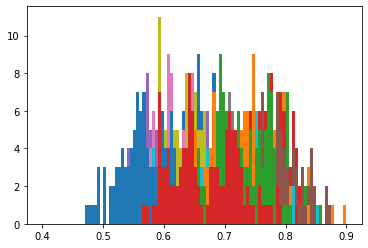

In [99]:
for i in range(len(sim_matrix)):
    sim_list = sim_matrix[i];
    print('comparing idea:',final_idea[i+2]);#starting from row 2
    print('most similar: ',df_idea['main'][np.argmax(sim_list)]);
    print('max similarity %: ',sim_list[np.argmax(sim_list)]);
    print('least similar: ',df_idea['main'][np.argmin(sim_list)]);
    print('min similarity %: ',sim_list[np.argmin(sim_list)]);
    plt.hist(pd.array(sim_list), bins = 100, range=[0.4,0.9]);
    print('\n')

 Daily wellness planner app


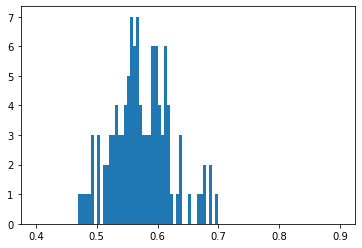

In [121]:
n = 10; #check individiual idea's similarity distribution
plt.hist(pd.array(sim_matrix[n]), bins = 100, range=[0.4,0.9]);
print(final_idea[n+2]); # starting from row 2

In [28]:
# for i in range(3): #test 3 / len(df_idea)
#     doc0 = bert(df_idea['main'][i]);
#     print(doc0);
#     for j in range(len(df_idea)):
#         if i != j:
#             doc1 = bert(df_idea['main'][j]);
#             sim = doc0.similarity(doc1);
#             doc_sim.append(sim);
#             print(doc1,sim);


nlp = spacy.load('en_core_web_sm')
doc = nlp("Apple shares rose on the news. Apple pie is delicious.")

print(doc[0].similarity(doc[7]))

1.0
